<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [8.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/08.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [9.0 Discrete Events](https://jckantor.github.io/cbe30338-2021/09.00-Discrete-Events.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/08.01-Zero-Order-Hold-and-Interpolation.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/08.01-Zero-Order-Hold-and-Interpolation.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 8.1 Zero-Order Hold and Interpolation

Implementation of control systems generally requires an interface between the sampled data computations of process control and the continuous time dynamics of the real world. A zero-order hold is the most common model for the reconstruction of a continuous time signal from sampled data. 

## 8.1.1 Interpolation Function

In [1]:
import numpy as np

def interp0(x, xp, yp):
    """Zeroth order hold interpolation w/ same
    (base)   signature  as numpy.interp."""

    def func(x0):
        if x0 <= xp[0]:
            return yp[0]
        if x0 >= xp[-1]:
            return yp[-1]
        k = 0
        while x0 > xp[k]:
            k += 1
        return yp[k-1]
    
    if isinstance(x,float):
        return func(x)
    elif isinstance(x, list):
        return [func(x) for x in x]
    elif isinstance(x, np.ndarray):
        return np.asarray([func(x) for x in x])
    else:
        raise TypeError('argument must be float, list, or ndarray')

## 8.1.2 Demonstration

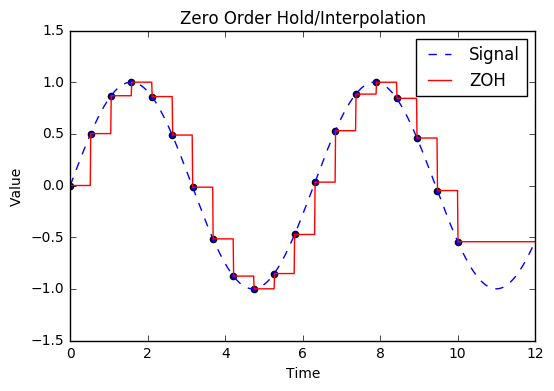

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# choose a function
f = np.sin

# sampled signal
xp = np.linspace(0,10,20)
yp = f(xp)

# interpolation grid with 'true' function
x = np.linspace(0,12,1000)
plt.plot(x,f(x),'--')

# plot
plt.hold(True)
plt.scatter(xp,yp)
plt.plot(x,interp0(x,xp,yp),'r')
plt.xlim([x.min(),x.max()])
plt.title('Zero Order Hold/Interpolation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Signal','ZOH'])

<!--NAVIGATION-->
< [8.0 Predictive Control](https://jckantor.github.io/cbe30338-2021/08.00-Predictive-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [9.0 Discrete Events](https://jckantor.github.io/cbe30338-2021/09.00-Discrete-Events.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/08.01-Zero-Order-Hold-and-Interpolation.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/08.01-Zero-Order-Hold-and-Interpolation.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>